In [1]:
import pandas as pd
import numpy as np
import math
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import time
from datetime import date
from tqdm.notebook import tqdm as tqdm
from matplotlib import cm
import ast
from ipynb.fs.defs.functions import getName
from ipynb.fs.defs.functions import new_route

dft = pd.read_csv("../distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
dfd = pd.read_csv("../distanze/distances_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

num_orders = pd.read_csv("../distanze/num_orders.csv", delimiter=";", encoding = "ISO-8859-1")
orders_matrix = pd.read_csv("distribution/ord_numbers.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
orders = pd.read_csv("../distanze/request_cr.csv", delimiter=",", encoding = "ISO-8859-1")

In [50]:
k = pd.read_csv("FrequencesResults/frequences.csv", encoding = "ISO-8859-1", index_col=0, header=0, squeeze = True)
week = ["lunedi", "martedi", "mercoledi", "giovedi", "venerdi", "sabato", "domenica"]
for d in week:
    k[d] = ast.literal_eval(k[d])

In [51]:
def manage_exception(string):
    if(string.lower().strip() == 'piadena drizzona'):
        return 'Piadena, Platina, 40'
    elif(string.lower().strip() == 'brescia'):
        return 'manerbio, insurrezione nazionale'
    elif(string.lower().strip() == 'centro fumetto a. pazienza' or string.lower().strip() == 'cremona. la piccola biblioteca' or string.lower().strip() == 'uff. bib. cremona'):
        return 'cremona, ugolani dati, 4'
    elif(string.lower().strip() == 'casale cremasco vidolasco'):
        return 'Casale Cremasco-Vidolasco, Roma, 56'
    elif(string.lower().strip() == 'cremona-m.i.t.o.'):
        return 'Cremona, Palosca n. 2'
    elif(string.lower().strip() == 'cremona - manin (scolastica)'):
        return 'Cremona, Felice Cavallotti, 2'
    elif(string.lower().strip() == 'gadesco pieve delmona'):
        return 'Gadesco-Pieve Delmona, Giovanni Lonati 9'
    elif(string.lower().strip() == 'cremona - cda'):
        return 'cremona, sesto 39'
    elif(string.lower().strip() == 'crema'):
        return 'Crema, Civerchi, 9'
    elif(string.lower().strip() == 'martignana di po, libertà, 64'):
        return 'martignana di po, libertà, 64'
    else:
        return string

In [41]:
freq = pd.DataFrame(index=dft.columns, columns=["partenza", "destinazione"])
freq = freq.replace(np.nan, 0)
for i in tqdm(range(len(orders))):
    row = orders.iloc[i]
    try:
        if(getName(dft, manage_exception(row["biblioteca_destinazione"])) != getName(dft, manage_exception(row["biblioteca_partenza"]))):
            freq["destinazione"][getName(dft, manage_exception(row["biblioteca_destinazione"]))] += 1
            freq["partenza"][getName(dft, manage_exception(row["biblioteca_partenza"]))] += 1
    except:
        None

C:\Users\Alberto\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [61]:
freq.to_csv("distribution/biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

['Offanengo, Clavelli Martini, 5', 'Soncino, Dante Alighieri, 23', 'lunedi']

In [64]:
week = k.index
for i in tqdm(range(len(week))):
    day = week[i]
    lista = k[day]
    tmp = pd.DataFrame(index=dft.columns, columns=dft.columns).replace(np.nan, 0)
    for el in lista:
        partenza = el[0]
        destinazione = el[1]
        tmp.loc[partenza].loc[destinazione] += 1
    tmp.to_csv("distribution/"+day+"_biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

In [74]:
daily_d = pd.DataFrame(index=k.index, columns=["tot"]).replace(np.nan, 0)
for d in k.index:
    daily_d["tot"].loc[d] = len(k[d])

In [79]:
daily_d.to_csv("distribution/week_biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

## Charts

In [189]:
#Single biblio freq
s_b_f = pd.read_csv("distribution/biblio_freq.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

tot_rz_p = [n for n in s_b_f["partenza"] if n!=0]
tot_rz_d = [n for n in s_b_f["destinazione"] if n!=0]
x = []
y = []
for i in range(1,10000):
    c = list(s_b_f["partenza"]).count(i)
    if c>0:
        y.append(c)
        x.append(i)
xd = []
yd = []
for i in range(1,10000):
    c = list(s_b_f["destinazione"]).count(i)
    if c>0:
        yd.append(c)
        xd.append(i)


In [185]:
list(s_b_f["partenza"]).count(57912)

1

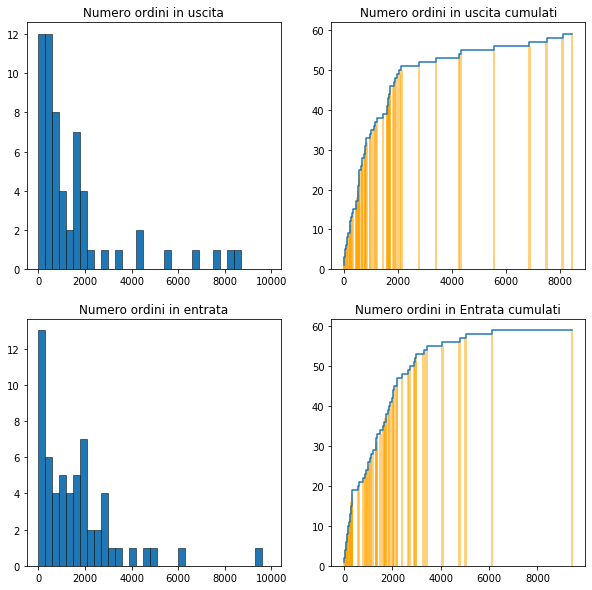

In [191]:
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.hist(tot_rz_p, bins=range(0,10000,300), edgecolor='black', linewidth=0.5)
plt.title("Numero ordini in uscita")
plt.subplot(222)
plt.bar(x, np.cumsum(y), width=100, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y))
plt.title("Numero ordini in uscita cumulati")

plt.subplot(223)
plt.hist(tot_rz_d, bins=range(0,10000,300), edgecolor='black', linewidth=0.5)
plt.title("Numero ordini in entrata")
plt.subplot(224)
plt.bar(xd, np.cumsum(yd), width=100, color="orange", alpha=0.5)
plt.step(xd, np.cumsum(yd))
plt.title("Numero ordini in Entrata cumulati")
plt.show()

In [97]:
tot = []
for d in k.index:
    tmp = pd.read_csv("distribution/"+d+"_biblio_freq.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
    for lt in tmp.values.tolist():
        tot += lt

In [134]:
tot_rz = [n for n in tot if n!=0]
x = []
y = []
for i in range(1,200):
    c = list(tot_rz).count(i)
    if c>0:
        y.append(c)
        x.append(i)

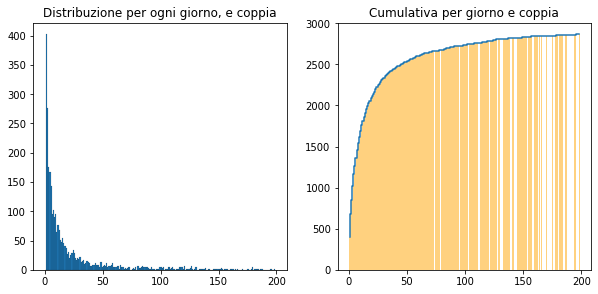

In [137]:
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.hist(tot_rz, bins=range(0,200,1), edgecolor='black', linewidth=0.1)
plt.title("Distribuzione per ogni giorno, e coppia")
plt.subplot(222)
plt.bar(x, np.cumsum(y), width=1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y))
plt.title("Cumulativa per giorno e coppia")

plt.show()

In [149]:
tot = []
tmp = pd.read_csv("distribution/ord_numbers.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
for lt in tmp.values.tolist():
    tot += lt

In [155]:
tot_rz = [n for n in tot if n!=0]
x = []
y = []
for i in range(1,500):
    c = list(tot_rz).count(i)
    if c>0:
        y.append(c)
        x.append(i)   

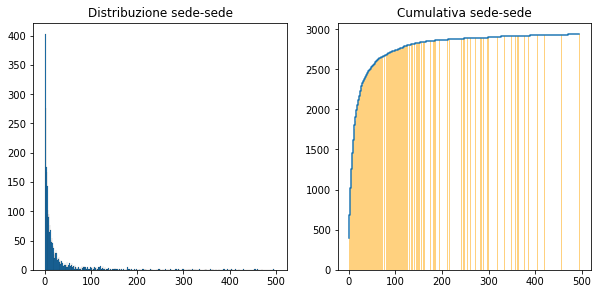

In [162]:
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.hist(tot_rz, bins=range(0,500,1), edgecolor='black', linewidth=0.1)
plt.title("Distribuzione sede-sede")
plt.subplot(222)
plt.bar(x, np.cumsum(y), width=1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y))
plt.title("Cumulativa sede-sede")

plt.show()